#### Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
ga_gsc_data = pd.read_csv('data/other_data/created_ga_gsc_data.csv',
                          usecols=['Page', 'Clicks', 'Impressions', 'CTR', 'Position',
                                   'Avg. Time on Page', 'Bounce Rate', 'Exit', 'Pageviews',
                                   'Unique Pageviews'])
ga_gsc_data.head(3)

,Page,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
0,https://miratrix.co.uk/,371,100673,0.37%,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095
1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181
2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64,0 days 00:04:06.000000000,53.335000,89.475000,30,26


#### Preparing Data for Visualization

In [3]:
#Remove the % sign by using string replace
ga_gsc_data.CTR = ga_gsc_data.CTR.str.replace('%','')

#Replace 0 days and convert the remaining string to a timedelta
ga_gsc_data['Avg. Time on Page'] = ga_gsc_data['Avg. Time on Page'].str.replace('0 days ','').apply(pd.Timedelta)

#Set Page as index
ga_gsc_data.set_index('Page', inplace=True)

ga_gsc_data.head(3)

,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
Page,,,,,,,,,
https://miratrix.co.uk/,371,100673,0.37,42.59,00:01:43.666666,47.296667,54.286667,1396,1095
https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26,26.84,00:01:45.333333,64.436667,60.913333,210,181
https://miratrix.co.uk/mobile-app-competitor-analysis/,16,1458,1.1,30.64,00:04:06,53.335000,89.475000,30,26


#### Bar charts

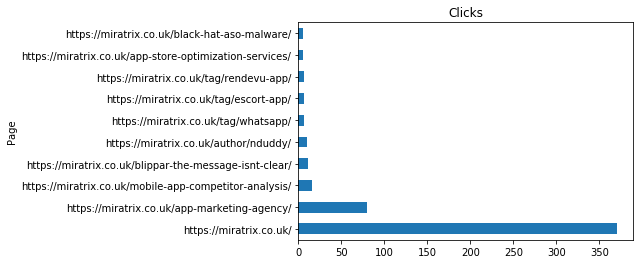

In [4]:
ga_gsc_data['Clicks'][:10].plot.barh(title = "Clicks") 

# Save hbchart ga_gsc_clicks
plt.savefig('graphs/barchart_ga_gsc_clicks.png')

plt.show()

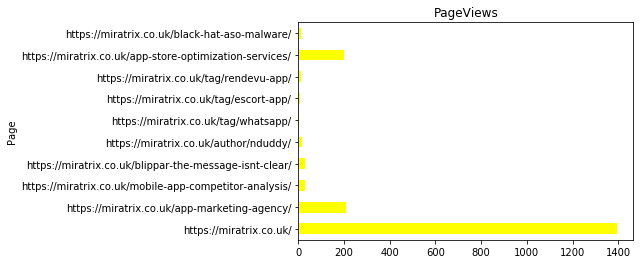

In [5]:
#second plot
ga_gsc_data['Pageviews'][:10].plot.barh(title = "PageViews", color = "yellow")

# Save hbchart ga_gsc_pageviews
plt.savefig('graphs/barchart_ga_gsc_pageviews.png')

plt.show()

#### Pie plot

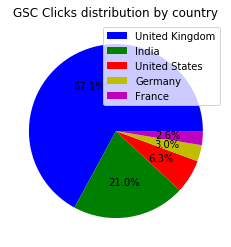

In [6]:
#Importing country data from Google Search Console
gsc_country = pd.read_csv('data/gsc_data/gsc_country.csv')
gsc_country.head()

# Create a pieplot
colors = ['b', 'g', 'r', 'y', 'm']
plt.pie(gsc_country.Clicks[:5], colors=colors, autopct='%1.1f%%')
plt.title('GSC Clicks distribution by country')
plt.legend(gsc_country.Country[:5],loc=0)

# Save pie plot
plt.savefig('graphs/GSC Clicks distribution by country.png')

plt.show()

#### Word Cloud

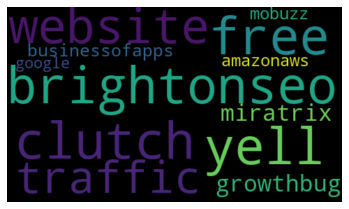

In [7]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Import google analytics refers data
ga_ref_data = pd.read_csv('data/ga_data/ga_refering_sites.csv', skiprows=6, nrows=10)
ga_ref_data.head()

#Cleaning unnecesary words
ga_ref_data['Source'] = ga_ref_data['Source'].str.replace( '.com' , '')
ga_ref_data['Source'] = ga_ref_data['Source'].str.replace( '.co' , '')
ga_ref_data['Source'] = ga_ref_data['Source'].str.replace( 'uk' , '')
ga_ref_data['Source'] = ga_ref_data['Source'].str.replace( 'search.' , '')
ga_ref_data['Source'] = ga_ref_data['Source'].str.replace( 's3.' , '')
ga_ref_data['Source'] = ga_ref_data['Source'].str.replace( '.org' , '')
ga_ref_data['Source']

#Store the text in a variable
text = ' '.join(ga_ref_data['Source'])

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=280, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Save Wordcloud 
wordcloud.to_file('graphs/wordcloud.png')

#### Line Chart Adwords ppc

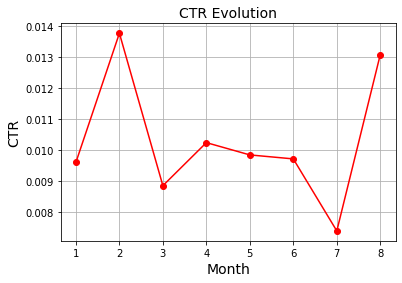

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#Import PPC data
ppc_data = pd.read_csv('data/other_data/ppc_data.csv')

#Create month column
ppc_data['month'] = pd.DatetimeIndex(ppc_data['Day']).month
#Create year column
ppc_data['year'] = pd.DatetimeIndex(ppc_data['Day']).year
#Filter ppc year 2019
year = ['2019']
ppc_data_2019 = ppc_data[ppc_data['year'].isin(year)]

#Group by month and CTR column
groupby_month = ppc_data_2019.groupby('month').agg({'Clicks':'sum', 'Impr.':'sum'})
groupby_month['CTR'] = (groupby_month['Clicks'] / groupby_month['Impr.'])

groupby_month


plt.plot(groupby_month['CTR'], color='red', marker='o')
plt.title('CTR Evolution', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('CTR', fontsize=14)
plt.grid(True)

# Save Line chart
plt.savefig('graphs/CTR.png')

plt.show()

#### Horizontal bar chart

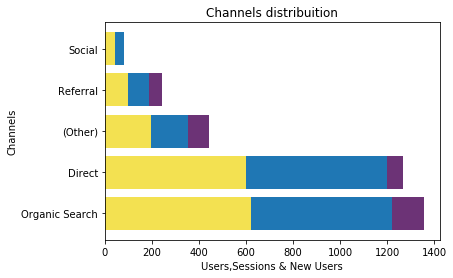

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#Import google analytics channels data
ga_total_data = pd.read_csv('data/ga_data/ga_total_channels.csv', skiprows=6, nrows=5)

ga_total_data.head(10)

plt.barh(ga_total_data['Channel Grouping'], ga_total_data['Users'], color="#f3e151")  
plt.barh(ga_total_data['Channel Grouping'], ga_total_data['Sessions'],left=ga_total_data['Users'], color="#6c3376")
plt.barh(ga_total_data['Channel Grouping'], ga_total_data['New Users'],left=ga_total_data['Users'])

#labels
plt.xlabel('Users,Sessions & New Users')  
plt.ylabel('Channels')
plt.title('Channels distribuition')

# Save Channels distribuition
plt.savefig('graphs/channels_distribution.png')

plt.show()

#### Time Series

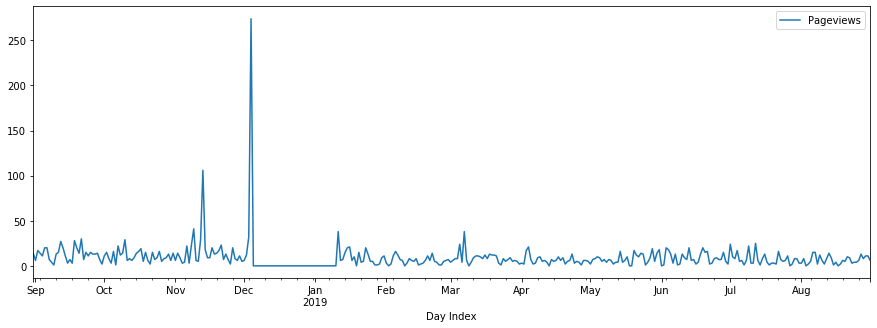

In [1]:
#importing files and libraries
import pandas as pd
import matplotlib.pyplot as plt 
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv', 
                                   skiprows=386, 
                                   nrows=366, 
                                   usecols=['Day Index', 'Pageviews'], 
                                   parse_dates=['Day Index'],
                                   index_col='Day Index')
ppc_data = pd.read_csv('data/other_data/ppc_data.csv',
                       parse_dates=['Day'],
                       index_col='Day')

#creating plot
ga_page_traffic_data.plot(figsize=(15,5))

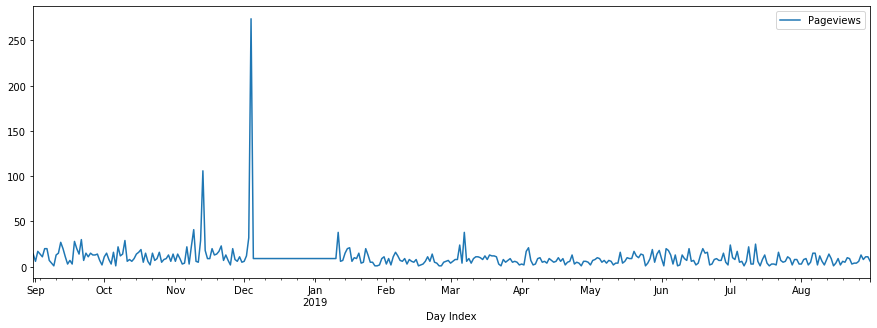

In [2]:
#Fixing missing values (mean instead of 0)
average_value = ga_page_traffic_data['Pageviews'].mean()
#Replace any values that are 0 with the average values
ga_page_traffic_data['Pageviews'].replace(0,
                                          average_value,
                                          inplace=True)
ga_page_traffic_data.plot(figsize=(15,5))

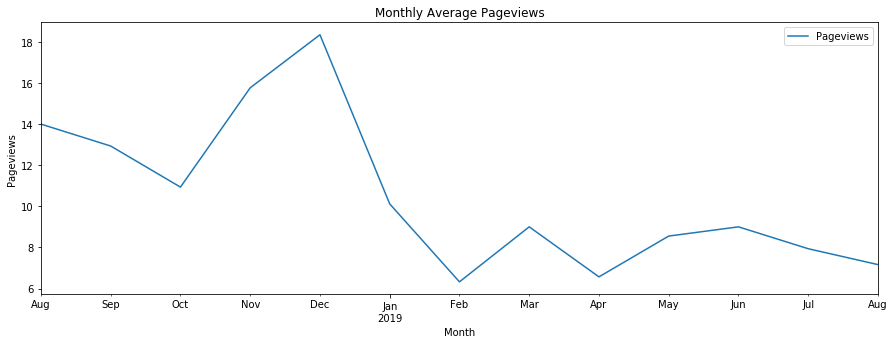

In [14]:
#Mean by Month using the resample method
ga_page_monthly = ga_page_traffic_data.resample('M').mean()
ga_page_monthly.plot(figsize=(15,5))

#labels
plt.xlabel('Month')  
plt.ylabel('Pageviews')
plt.title('Monthly Average Pageviews')

# Save Monthly Average Pageviews
plt.savefig('graphs/monthly_avg_pageviews.png')

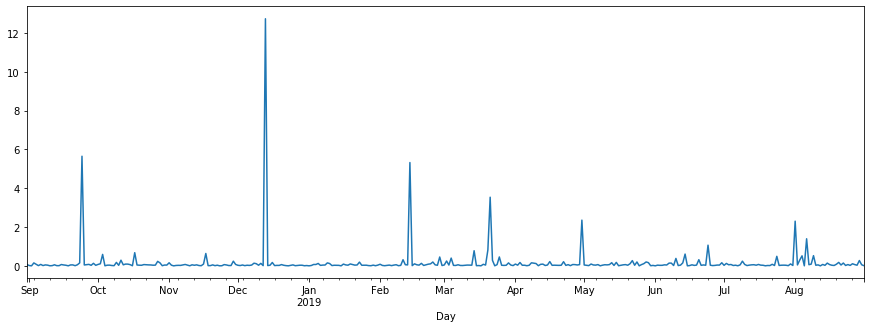

In [8]:
# Calculating cpc
ppc_data.head()
cpc = (ppc_data['Clicks']/ppc_data['Cost'])
cpc.plot(figsize=(15,5))

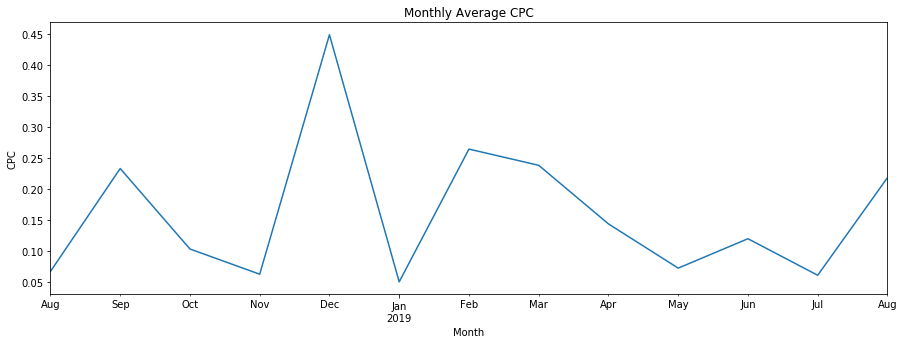

In [15]:
cpc_monthly = (ppc_data['Clicks']/ppc_data['Cost']).resample('M').mean()
cpc_monthly.plot(figsize=(15,5))


#labels
plt.xlabel('Month')  
plt.ylabel('CPC')
plt.title('Monthly Average CPC')

# Save Monthly Average Pageviews
plt.savefig('graphs/monthly_avg_cpc.png')